# Abstract

This project is centered around the cleaning and transformation of data related to Air Quality Index (AQI) levels and COVID-19 confirmed cases and deaths for the cities of Beijing and Shanghai from China.

AQI data will be collected for the years 2020 and 2021 from [AirNow](https://www.airnow.gov/international/us-embassies-and-consulates/#China), then it will be joined with COVID-19 data from [John Hopkins Whiting School of Engineers](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data) to help us identify whether there exists a relationship between AQI levels and the number of COVID-19 confirmed cases and deaths. 

The purpose of cleaning and transforming this data is to later find out whether or not the air quality of a place can help to estimate how many COVID-19 related confirmed cases or deaths the place will have.


In [249]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import plotly.express as px
import seaborn as sns

# AQI Data Sets Screening

First, let's import the AQI data of Beijing and Shanghai using the pd.read_csv function.

In [250]:
#Beijing

beijing_2020= pd.read_csv("data/Beijing_PM2.5_2020_YTD.csv")
beijing_2021= pd.read_csv("data/Beijing_PM2.5_2021_YTD.csv")

In [251]:
#Shanghai

shanghai_2020= pd.read_csv("data/Shanghai_PM2.5_2020_YTD.csv")
shanghai_2021= pd.read_csv("data/Shanghai_PM2.5_2021_YTD.csv")

Since we have 2 dataframes for the same city (for the years 2020 and 2021), let's also consolidate the two dataframes into one for each city using the pd.concat function.

In [252]:
#ConsolidatedTable1
consolidated1 = [beijing_2020,beijing_2021]
beijing = pd.concat(consolidated1)
beijing.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Beijing,PM2.5 - Principal,2020-01-01 01:00 AM,2020,1,1,1,35.3,100,Moderate,32.0,UG/M3,1 Hr,Valid
1,Beijing,PM2.5 - Principal,2020-01-01 02:00 AM,2020,1,1,2,30.5,90,Moderate,25.0,UG/M3,1 Hr,Valid
2,Beijing,PM2.5 - Principal,2020-01-01 03:00 AM,2020,1,1,3,27.0,82,Moderate,23.0,UG/M3,1 Hr,Valid
3,Beijing,PM2.5 - Principal,2020-01-01 04:00 AM,2020,1,1,4,26.0,80,Moderate,25.0,UG/M3,1 Hr,Valid
4,Beijing,PM2.5 - Principal,2020-01-01 05:00 AM,2020,1,1,5,23.9,76,Moderate,22.0,UG/M3,1 Hr,Valid


In [253]:
#ConsolidatedTable2
consolidated2 = [shanghai_2020,shanghai_2021]
shanghai = pd.concat(consolidated2)
shanghai.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Shanghai,PM2.5 - Principal,2020-01-01 01:00 AM,2020,1,1,1,9.8,41,Good,10.0,UG/M3,1 Hr,Valid
1,Shanghai,PM2.5 - Principal,2020-01-01 02:00 AM,2020,1,1,2,12.7,52,Moderate,16.0,UG/M3,1 Hr,Valid
2,Shanghai,PM2.5 - Principal,2020-01-01 03:00 AM,2020,1,1,3,11.0,46,Good,9.0,UG/M3,1 Hr,Valid
3,Shanghai,PM2.5 - Principal,2020-01-01 04:00 AM,2020,1,1,4,10.5,44,Good,10.0,UG/M3,1 Hr,Valid
4,Shanghai,PM2.5 - Principal,2020-01-01 05:00 AM,2020,1,1,5,10.3,43,Good,10.0,UG/M3,1 Hr,Valid


Let's rename the column Site to City, so it is easier to identify further. 

In [254]:
#Rename
shanghai.rename(columns={'Site': 'City'}, inplace=True)
beijing.rename(columns={'Site': 'City'}, inplace=True)

Let's check the data types of each column in both dataframes.

In [255]:
shanghai.dtypes

City              object
Parameter         object
Date (LT)         object
Year               int64
Month              int64
Day                int64
Hour               int64
NowCast Conc.    float64
AQI                int64
AQI Category      object
Raw Conc.        float64
Conc. Unit        object
Duration          object
QC Name           object
dtype: object

In [256]:
beijing.dtypes

City              object
Parameter         object
Date (LT)         object
Year               int64
Month              int64
Day                int64
Hour               int64
NowCast Conc.    float64
AQI                int64
AQI Category      object
Raw Conc.        float64
Conc. Unit        object
Duration          object
QC Name           object
dtype: object

We can see that the date has data type object. Let's convert that to datetime and extract only the date part.

In [257]:
#Fix the date format
shanghai['Date (LT)'] = pd.to_datetime(shanghai['Date (LT)'])
shanghai['Date (LT)'] = pd.to_datetime(shanghai['Date (LT)']).dt.date

In [258]:
beijing['Date (LT)'] = pd.to_datetime(beijing['Date (LT)'])
beijing['Date (LT)'] = pd.to_datetime(beijing['Date (LT)']).dt.date

Let's drop the columns 'Hour' and 'Duration' as they won't be needed for further analysis.

In [259]:
beijing = beijing.drop(['Hour', 'Duration'], axis=1)

In [260]:
shanghai = shanghai.drop(['Hour', 'Duration'], axis=1)

In [261]:
print("The beijing dataset has", beijing.shape[0],"rows and", beijing.shape[1], "columns.")
print("The shanghai dataset has", shanghai.shape[0],"rows and", shanghai.shape[1], "columns.")

The beijing dataset has 17544 rows and 12 columns.
The shanghai dataset has 17075 rows and 12 columns.


Let's check whether our dataframes contain any missing values.

In [262]:
beijing.isna().sum()

City               0
Parameter          0
Date (LT)          0
Year               0
Month              0
Day                0
NowCast Conc.      0
AQI                0
AQI Category     164
Raw Conc.          0
Conc. Unit         0
QC Name            0
dtype: int64

In [263]:
shanghai.isna().sum()

City              0
Parameter         0
Date (LT)         0
Year              0
Month             0
Day               0
NowCast Conc.     0
AQI               0
AQI Category     52
Raw Conc.         0
Conc. Unit        0
QC Name           0
dtype: int64

We can see that both dataframes show missing values for the column AQI Category. However, this will be fixed later, as we will create new ranges for each AQI category.

In [264]:
beijing.groupby(beijing['Year']).count()

,City,Parameter,Date (LT),Month,Day,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,QC Name
Year,,,,,,,,,,,
2020,8783,8783,8783,8783,8783,8783,8783,8735,8783,8783,8783
2021,8760,8760,8760,8760,8760,8760,8760,8644,8760,8760,8760
2022,1,1,1,1,1,1,1,1,1,1,1


In [265]:
shanghai.groupby(shanghai['Year']).count()

,City,Parameter,Date (LT),Month,Day,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,QC Name
Year,,,,,,,,,,,
2020,8736,8736,8736,8736,8736,8736,8736,8709,8736,8736,8736
2021,8338,8338,8338,8338,8338,8338,8338,8313,8338,8338,8338
2022,1,1,1,1,1,1,1,1,1,1,1


Moreover, both dataframes show one observation labeled in the year 2022. Let's remove that observation as our analysis will be focused on 2020 and 2021.

In [266]:
#Drop the 2022 Data

beijing = beijing[beijing['Year']<2022]
beijing = beijing.reset_index(drop= True)

shanghai = shanghai[shanghai['Year']<2022]
shanghai = shanghai.reset_index(drop= True)

Let's check for data accuracy using the describe method.

In [267]:
#Summary of Statistics
beijing.describe()

,Year,Month,Day,NowCast Conc.,AQI,Raw Conc.
count,17543.000000,17543.000000,17543.000000,17543.000000,17543.000000,17543.000000
mean,2020.499344,6.520150,15.739554,29.852129,84.766118,30.432708
std,0.500014,3.449496,8.803719,107.359654,118.570028,105.977549
min,2020.000000,1.000000,1.000000,-999.000000,-999.000000,-999.000000
25%,2020.000000,4.000000,8.000000,13.300000,54.000000,13.000000
50%,2020.000000,7.000000,16.000000,27.700000,84.000000,27.000000
75%,2021.000000,10.000000,23.000000,50.600000,138.000000,51.000000
max,2021.000000,12.000000,31.000000,473.800000,482.000000,680.000000


In [268]:
#Summary of Statistics
shanghai.describe()

,Year,Month,Day,NowCast Conc.,AQI,Raw Conc.
count,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000
mean,2020.488345,6.484186,15.850533,25.358815,79.070282,21.038187
std,0.499879,3.462429,8.832406,60.459680,70.436687,90.386846
min,2020.000000,1.000000,1.000000,-999.000000,-999.000000,-999.000000
25%,2020.000000,3.000000,8.000000,14.700000,56.000000,14.000000
50%,2020.000000,6.000000,16.000000,22.400000,73.000000,22.000000
75%,2021.000000,10.000000,24.000000,35.100000,99.000000,35.000000
max,2021.000000,12.000000,31.000000,206.500000,256.000000,355.000000


We can see that the columns AQI, NowCast Conc. and Raw Conc. have some observations -999. These are also considered to be missing values and will be removed.

In [269]:
##Drop -999 AQI values 
beijing = beijing[beijing['AQI']>0]
beijing = beijing.reset_index(drop=True)

In [270]:
##Drop -999 AQI values 
shanghai = shanghai[shanghai['AQI']>0]
shanghai = shanghai.reset_index(drop=True)

In [271]:
##Drop -999 values Raw Conc 
beijing = beijing[beijing['Raw Conc.']>0]
beijing = beijing.reset_index(drop=True)

In [272]:
##Drop -999 values Raw Conc 
shanghai = shanghai[shanghai['Raw Conc.']>0]
shanghai = shanghai.reset_index(drop=True)

In [273]:
##Drop -999 values NowCast Conc 
beijing = beijing[beijing['NowCast Conc.']>0]
beijing = beijing.reset_index(drop=True)

In [274]:
##Drop -999 values NowCast Conc 
shanghai = shanghai[shanghai['NowCast Conc.']>0]
shanghai = shanghai.reset_index(drop=True)

Additionally, let's check unique values of QC Name, which indicates which observations are valid or invalid, based on the AQI monitor. The records showing as invalid will be removed. 

In [275]:
beijing['QC Name'].value_counts()

Valid      17314
Invalid        6
Name: QC Name, dtype: int64

In [276]:
shanghai['QC Name'].value_counts()

Valid      16863
Invalid        4
Name: QC Name, dtype: int64

In [277]:
#Drop the Invalid QCName

beijing = beijing[beijing['QC Name']=='Valid']
beijing = beijing.reset_index(drop= True)

shanghai = shanghai[shanghai['QC Name']=='Valid']
shanghai = shanghai.reset_index(drop= True)

Now, we have 24 AQI records for each day (the measurement is taken hourly). But, since we know that COVID-19 confirmed cases and deaths are measured daily, we will aggregate our AQI dataframes by daily average using the groupby method.

In [278]:
cleaned_beijing = beijing.copy()

In [279]:
beijing = round(beijing.groupby(['Date (LT)']).mean().reset_index(),1)
beijing  = pd.DataFrame(beijing)
beijing.insert(1,'City',cleaned_beijing['City'], True)
beijing.insert(1,'Parameter',cleaned_beijing['Parameter'], True)
beijing.insert(1,'Conc. Unit',cleaned_beijing['Conc. Unit'], True)
beijing.insert(1,'QC Name',cleaned_beijing['QC Name'], True)
beijing.insert(1,'AQI Category',cleaned_beijing['AQI Category'], True)
beijing = beijing[['City', 'Parameter', 'Date (LT)', 'Year', 'Month','Day','NowCast Conc.','AQI','AQI Category','Raw Conc.','Conc. Unit','QC Name']]
beijing.head()

,City,Parameter,Date (LT),Year,Month,Day,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,QC Name
0,Beijing,PM2.5 - Principal,2020-01-01,2020.0,1.0,1.0,31.1,91.7,Moderate,31.7,UG/M3,Valid
1,Beijing,PM2.5 - Principal,2020-01-02,2020.0,1.0,2.0,50.6,135.2,Moderate,51.2,UG/M3,Valid
2,Beijing,PM2.5 - Principal,2020-01-03,2020.0,1.0,3.0,49.0,126.1,Moderate,49.0,UG/M3,Valid
3,Beijing,PM2.5 - Principal,2020-01-04,2020.0,1.0,4.0,36.8,100.7,Moderate,36.2,UG/M3,Valid
4,Beijing,PM2.5 - Principal,2020-01-05,2020.0,1.0,5.0,61.5,153.8,Moderate,62.0,UG/M3,Valid


The Year, Month and Day will be converted back to int64, the rest will remain float for data precision.

In [280]:
beijing['Year'] = beijing['Year'].astype(np.int64)
beijing['Month'] = beijing['Month'].astype(np.int64)
beijing['Day'] = beijing['Day'].astype(np.int64)
beijing.head()

,City,Parameter,Date (LT),Year,Month,Day,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,QC Name
0,Beijing,PM2.5 - Principal,2020-01-01,2020,1,1,31.1,91.7,Moderate,31.7,UG/M3,Valid
1,Beijing,PM2.5 - Principal,2020-01-02,2020,1,2,50.6,135.2,Moderate,51.2,UG/M3,Valid
2,Beijing,PM2.5 - Principal,2020-01-03,2020,1,3,49.0,126.1,Moderate,49.0,UG/M3,Valid
3,Beijing,PM2.5 - Principal,2020-01-04,2020,1,4,36.8,100.7,Moderate,36.2,UG/M3,Valid
4,Beijing,PM2.5 - Principal,2020-01-05,2020,1,5,61.5,153.8,Moderate,62.0,UG/M3,Valid


In [281]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           729 non-null    object 
 1   Parameter      729 non-null    object 
 2   Date (LT)      729 non-null    object 
 3   Year           729 non-null    int64  
 4   Month          729 non-null    int64  
 5   Day            729 non-null    int64  
 6   NowCast Conc.  729 non-null    float64
 7   AQI            729 non-null    float64
 8   AQI Category   729 non-null    object 
 9   Raw Conc.      729 non-null    float64
 10  Conc. Unit     729 non-null    object 
 11  QC Name        729 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 68.5+ KB


In [282]:
cleaned_shanghai = shanghai.copy()

In [283]:
shanghai = round(shanghai.groupby(['Date (LT)']).mean().reset_index(),1)
shanghai  = pd.DataFrame(shanghai)
shanghai.insert(1,'City',cleaned_shanghai['City'], True)
shanghai.insert(1,'Parameter',cleaned_shanghai['Parameter'], True)
shanghai.insert(1,'Conc. Unit',cleaned_shanghai['Conc. Unit'], True)
shanghai.insert(1,'QC Name',cleaned_shanghai['QC Name'], True)
shanghai.insert(1,'AQI Category',cleaned_shanghai['AQI Category'], True)
shanghai = shanghai[['City', 'Parameter', 'Date (LT)', 'Year', 'Month','Day','NowCast Conc.','AQI','AQI Category','Raw Conc.','Conc. Unit','QC Name']]
shanghai.head()

,City,Parameter,Date (LT),Year,Month,Day,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,QC Name
0,Shanghai,PM2.5 - Principal,2020-01-01,2020.0,1.0,1.0,13.7,53.3,Good,14.0,UG/M3,Valid
1,Shanghai,PM2.5 - Principal,2020-01-02,2020.0,1.0,2.0,21.2,70.5,Moderate,22.2,UG/M3,Valid
2,Shanghai,PM2.5 - Principal,2020-01-03,2020.0,1.0,3.0,36.0,103.7,Good,35.7,UG/M3,Valid
3,Shanghai,PM2.5 - Principal,2020-01-04,2020.0,1.0,4.0,57.4,134.0,Good,60.2,UG/M3,Valid
4,Shanghai,PM2.5 - Principal,2020-01-05,2020.0,1.0,5.0,40.0,107.1,Good,36.9,UG/M3,Valid


Similar as before, the Year, Month and Day will be converted back to int64, the rest will remain float for data precision.

In [284]:
shanghai['Year'] = shanghai['Year'].astype(np.int64)
shanghai['Month'] = shanghai['Month'].astype(np.int64)
shanghai['Day'] = shanghai['Day'].astype(np.int64)
shanghai.head()

,City,Parameter,Date (LT),Year,Month,Day,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,QC Name
0,Shanghai,PM2.5 - Principal,2020-01-01,2020,1,1,13.7,53.3,Good,14.0,UG/M3,Valid
1,Shanghai,PM2.5 - Principal,2020-01-02,2020,1,2,21.2,70.5,Moderate,22.2,UG/M3,Valid
2,Shanghai,PM2.5 - Principal,2020-01-03,2020,1,3,36.0,103.7,Good,35.7,UG/M3,Valid
3,Shanghai,PM2.5 - Principal,2020-01-04,2020,1,4,57.4,134.0,Good,60.2,UG/M3,Valid
4,Shanghai,PM2.5 - Principal,2020-01-05,2020,1,5,40.0,107.1,Good,36.9,UG/M3,Valid


In [285]:
shanghai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           721 non-null    object 
 1   Parameter      721 non-null    object 
 2   Date (LT)      721 non-null    object 
 3   Year           721 non-null    int64  
 4   Month          721 non-null    int64  
 5   Day            721 non-null    int64  
 6   NowCast Conc.  721 non-null    float64
 7   AQI            721 non-null    float64
 8   AQI Category   721 non-null    object 
 9   Raw Conc.      721 non-null    float64
 10  Conc. Unit     721 non-null    object 
 11  QC Name        721 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 67.7+ KB


Let's redefine the AQI categories according to the AirNow ranges.

In [286]:
def format_fn(x): 
    if x < 50:
        return 'Good'
    elif x <100:
        return 'Moderate'
    elif x< 150:
        return 'Unhealthy for Sensitive Groups'
    elif x<200:
        return 'Unhealthy'
    elif x<300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

beijing['AQI Category']=beijing['AQI'].apply(format_fn)
shanghai['AQI Category']=shanghai['AQI'].apply(format_fn)

In [287]:
#FinalDataset

beijing.head()

,City,Parameter,Date (LT),Year,Month,Day,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,QC Name
0,Beijing,PM2.5 - Principal,2020-01-01,2020,1,1,31.1,91.7,Moderate,31.7,UG/M3,Valid
1,Beijing,PM2.5 - Principal,2020-01-02,2020,1,2,50.6,135.2,Unhealthy for Sensitive Groups,51.2,UG/M3,Valid
2,Beijing,PM2.5 - Principal,2020-01-03,2020,1,3,49.0,126.1,Unhealthy for Sensitive Groups,49.0,UG/M3,Valid
3,Beijing,PM2.5 - Principal,2020-01-04,2020,1,4,36.8,100.7,Unhealthy for Sensitive Groups,36.2,UG/M3,Valid
4,Beijing,PM2.5 - Principal,2020-01-05,2020,1,5,61.5,153.8,Unhealthy,62.0,UG/M3,Valid


In [288]:
shanghai.head()

,City,Parameter,Date (LT),Year,Month,Day,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,QC Name
0,Shanghai,PM2.5 - Principal,2020-01-01,2020,1,1,13.7,53.3,Moderate,14.0,UG/M3,Valid
1,Shanghai,PM2.5 - Principal,2020-01-02,2020,1,2,21.2,70.5,Moderate,22.2,UG/M3,Valid
2,Shanghai,PM2.5 - Principal,2020-01-03,2020,1,3,36.0,103.7,Unhealthy for Sensitive Groups,35.7,UG/M3,Valid
3,Shanghai,PM2.5 - Principal,2020-01-04,2020,1,4,57.4,134.0,Unhealthy for Sensitive Groups,60.2,UG/M3,Valid
4,Shanghai,PM2.5 - Principal,2020-01-05,2020,1,5,40.0,107.1,Unhealthy for Sensitive Groups,36.9,UG/M3,Valid


In [289]:
print("The beijing final dataset has", beijing.shape[0],"rows and", beijing.shape[1], "columns.")
print("The shanghai final dataset has", shanghai.shape[0],"rows and", shanghai.shape[1], "columns.")

The beijing final dataset has 729 rows and 12 columns.
The shanghai final dataset has 721 rows and 12 columns.


Finally, let's merge the dataframes into one for the country of China, which will contain both cities of Beijing and Shanghai.

In [290]:
#ConsolidatedTable1
consolidated2 = [beijing,shanghai]
China = pd.concat(consolidated2)
display(China)

,City,Parameter,Date (LT),Year,Month,Day,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,QC Name
0,Beijing,PM2.5 - Principal,2020-01-01,2020,1,1,31.1,91.7,Moderate,31.7,UG/M3,Valid
1,Beijing,PM2.5 - Principal,2020-01-02,2020,1,2,50.6,135.2,Unhealthy for Sensitive Groups,51.2,UG/M3,Valid
2,Beijing,PM2.5 - Principal,2020-01-03,2020,1,3,49.0,126.1,Unhealthy for Sensitive Groups,49.0,UG/M3,Valid
3,Beijing,PM2.5 - Principal,2020-01-04,2020,1,4,36.8,100.7,Unhealthy for Sensitive Groups,36.2,UG/M3,Valid
4,Beijing,PM2.5 - Principal,2020-01-05,2020,1,5,61.5,153.8,Unhealthy,62.0,UG/M3,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...
716,Shanghai,PM2.5 - Principal,2021-12-27,2021,12,27,32.2,93.9,Moderate,33.7,UG/M3,Valid
717,Shanghai,PM2.5 - Principal,2021-12-28,2021,12,28,51.8,140.4,Unhealthy for Sensitive Groups,52.9,UG/M3,Valid
718,Shanghai,PM2.5 - Principal,2021-12-29,2021,12,29,61.6,153.2,Unhealthy,63.0,UG/M3,Valid
719,Shanghai,PM2.5 - Principal,2021-12-30,2021,12,30,84.8,166.1,Unhealthy,87.1,UG/M3,Valid


Let's check the data types again.

In [291]:
China.dtypes

City              object
Parameter         object
Date (LT)         object
Year               int64
Month              int64
Day                int64
NowCast Conc.    float64
AQI              float64
AQI Category      object
Raw Conc.        float64
Conc. Unit        object
QC Name           object
dtype: object

Let's convert the Date to datetime again.

In [292]:
China['Date (LT)'] = pd.to_datetime(China['Date (LT)'])

Let's check if our final dataframe has any missing values.

In [293]:
China.isna().sum()

City             0
Parameter        0
Date (LT)        0
Year             0
Month            0
Day              0
NowCast Conc.    0
AQI              0
AQI Category     0
Raw Conc.        0
Conc. Unit       0
QC Name          0
dtype: int64

Now that we have cleaned and transformed our AQI data, let's continue with the screening of the COVID-19 datasets.

# COVID-19 Data Sets Screening

Before continuing with the cleaning and transformations, let's import the COVID-19 data sets.

In [294]:
# Importing confirmed cases data
cases_df = pd.read_csv('data/time_series_covid19_confirmed_global.csv')
cases_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289


In [295]:
print("The covid-19 confirmed cases data set has", cases_df.shape[0],"rows and", cases_df.shape[1], "columns.")

The covid-19 confirmed cases data set has 278 rows and 517 columns.


Let's check if our dataframe has any missing values.

In [296]:
# Checking the missing values for each variable
cases_df.isna().sum()

Province/State    191
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
6/13/21             0
6/14/21             0
6/15/21             0
6/16/21             0
6/17/21             0
Length: 517, dtype: int64

We can see that the column Province/State has 191 missing values, Lat and Long both are missing 2 values. However, we'll only use the cities Beijing and Shanghai. Let's see if we have them in the data.

In [297]:
cases_df['Province/State'].isin(['Beijing','Shanghai']).sum()

2

In [298]:
cases_df[(cases_df['Province/State']=='Beijing') | (cases_df['Province/State']=='Shanghai')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,1067,1067,1068,1069,1069,1070,1071,1071,1072,1072
83,Shanghai,China,31.2020,121.4491,9,16,20,33,40,53,...,2132,2139,2141,2149,2155,2160,2165,2168,2170,2173


As can be seen above, both of the cities are included in the data set. 

Additionally, the COVID-19 confirmed cases data is in a wide format. To be able to join this data with the AQI data, we need to filter the rows of the cities we're interested in -Beijing and Shanghai- and turn this data to long format.

In [299]:
# Filtering cities Beijing and Shanghai
cases_df = cases_df[(cases_df['Province/State']=='Beijing')|
         (cases_df['Province/State']=='Shanghai')]
         

In [300]:
print("cases_df now has", cases_df.shape[0], "rows and", cases_df.shape[1], "columns.")

cases_df now has 2 rows and 517 columns.


In [301]:
# Reshaping cases_df to long format
cases_df = pd.melt(cases_df, id_vars=['Province/State','Country/Region','Lat','Long'], var_name='Date', value_name='confirmed_cases')
cases_df.head()

,Province/State,Country/Region,Lat,Long,Date,confirmed_cases
0,Beijing,China,40.1824,116.4142,1/22/20,14
1,Shanghai,China,31.2020,121.4491,1/22/20,9
2,Beijing,China,40.1824,116.4142,1/23/20,22
3,Shanghai,China,31.2020,121.4491,1/23/20,16
4,Beijing,China,40.1824,116.4142,1/24/20,36


In [302]:
print("cases_df now has", cases_df.shape[0], "rows and", cases_df.shape[1], "columns.")

cases_df now has 1026 rows and 6 columns.


Let's check the data types of each of our columns.

In [303]:
# Getting the types of the columns for cases_df
cases_df.dtypes

Province/State      object
Country/Region      object
Lat                float64
Long               float64
Date                object
confirmed_cases      int64
dtype: object

From the output above, we can see that Province/State and Date have object type of data. We have to format Date as datetime format and Province/State as string.

In [304]:
# formatting 'Province/State' as string
cases_df['Province/State'] = cases_df['Province/State'].astype("string")

In [305]:
# formatting 'Date' as datetime
cases_df['Date'] = pd.to_datetime(cases_df['Date'], format="%m/%d/%y")

Let's check the types again. And visualize the changes to the Date column.

In [306]:
cases_df.dtypes

Province/State             string
Country/Region             object
Lat                       float64
Long                      float64
Date               datetime64[ns]
confirmed_cases             int64
dtype: object

In [307]:
# visualizing the changes
cases_df.head()

,Province/State,Country/Region,Lat,Long,Date,confirmed_cases
0,Beijing,China,40.1824,116.4142,2020-01-22,14
1,Shanghai,China,31.2020,121.4491,2020-01-22,9
2,Beijing,China,40.1824,116.4142,2020-01-23,22
3,Shanghai,China,31.2020,121.4491,2020-01-23,16
4,Beijing,China,40.1824,116.4142,2020-01-24,36


Now that we have the variables in the correct format, to follow the naming convention mentioned above, let's rename 'Province/State' to City.


In [308]:
cases_df.rename(columns={"Province/State": "City"}, inplace=True)
cases_df.columns

Index(['City', 'Country/Region', 'Lat', 'Long', 'Date', 'confirmed_cases'], dtype='object')

Now let's create a map to showcase confirmed cases by city.

In [309]:
map_cases = px.scatter_geo(cases_df,lat='Lat',lon='Long', hover_name="City", scope="asia", 
                     size = "confirmed_cases", color = "City")
map_cases.update_layout(title = 'Confirmed Cases Map', title_x=0.5)
map_cases.show()

We can see in the map by the size of the circle, that Shanghai had a higher number of confirmed cases. 

Finally, let's drop the columns 'Country/Region', 'Lat' and 'Long' as they won't be needed for further analysis.

In [310]:
# Dropping columns 'Country/Region', 'Lat' and 'Long'
cases_df = cases_df.drop(columns=['Country/Region','Lat','Long'])
cases_df.head()

,City,Date,confirmed_cases
0,Beijing,2020-01-22,14
1,Shanghai,2020-01-22,9
2,Beijing,2020-01-23,22
3,Shanghai,2020-01-23,16
4,Beijing,2020-01-24,36


In [311]:
print("cases_df now has", cases_df.shape[0], "rows and", cases_df.shape[1], "columns.")

cases_df now has 1026 rows and 3 columns.


Now that our confirmed cases dataframe has the same naming convention as the AQI dataframe and we have transformed and cleaned the data, let's apply all of the same transformations and cleaning to the deaths data set.

First, let's import our deaths data.



In [312]:
# Importing deaths data
deaths_df = pd.read_csv('data/time_series_covid19_deaths_global.csv')
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,3251,3305,3356,3412,3449,3527,3612,3683,3683,3842
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2452,2452,2452,2453,2453,2453,2453,2454,2454,2454
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3537,3544,3552,3560,3565,3571,3579,3588,3598,3605
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,803,811,815,819,825,831,836,842,847,851


In [313]:
print("The covid-19 deaths data set has", deaths_df.shape[0],"rows and", deaths_df.shape[1], "columns.")

The covid-19 deaths data set has 278 rows and 517 columns.


Let's check if our dataframe has any missing values.

In [314]:
# Checking the missing values for each variable
deaths_df.isna().sum()

Province/State    191
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
6/13/21             0
6/14/21             0
6/15/21             0
6/16/21             0
6/17/21             0
Length: 517, dtype: int64

We can see that the column Province/State has 191 missing values, Lat and Long both are missing 2 values. However, as before, we'll only use the cities Beijing and Shanghai. Let's see if we have them in the data.

In [315]:
deaths_df['Province/State'].isin(['Beijing','Shanghai']).sum()

2

In [316]:
deaths_df[(deaths_df['Province/State']=='Beijing') | (deaths_df['Province/State']=='Shanghai')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21
59,Beijing,China,40.1824,116.4142,0,0,0,0,0,1,...,9,9,9,9,9,9,9,9,9,9
83,Shanghai,China,31.2020,121.4491,0,0,0,0,1,1,...,7,7,7,7,7,7,7,7,7,7


As can be seen above, both of the cities are included in the data set. Additionally, the COVID-19 deaths data is also in a wide format. To be able to join this data with the confirmed cases and AQI data, we need to filter the rows of the cities we're interested in -Beijing and Shanghai- and turn this data to long format.

In [317]:
# Filtering cities Beijing and Shanghai
deaths_df = deaths_df[(deaths_df['Province/State']=='Beijing')|
         (deaths_df['Province/State']=='Shanghai')]
         

In [318]:
print("deaths_df now has", deaths_df.shape[0], "rows and", deaths_df.shape[1], "columns.")

deaths_df now has 2 rows and 517 columns.


In [319]:
# Reshaping deaths_df to long format
deaths_df = pd.melt(deaths_df, id_vars=['Province/State','Country/Region','Lat','Long'], var_name='Date', value_name='deaths')
deaths_df.head()

,Province/State,Country/Region,Lat,Long,Date,deaths
0,Beijing,China,40.1824,116.4142,1/22/20,0
1,Shanghai,China,31.2020,121.4491,1/22/20,0
2,Beijing,China,40.1824,116.4142,1/23/20,0
3,Shanghai,China,31.2020,121.4491,1/23/20,0
4,Beijing,China,40.1824,116.4142,1/24/20,0


In [320]:
print("deaths_df now has", deaths_df.shape[0], "rows and", deaths_df.shape[1], "columns.")

deaths_df now has 1026 rows and 6 columns.


Let's check the data types of each of our columns.

In [321]:
# Getting the types of the columns for deaths_df
deaths_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
deaths              int64
dtype: object

As with the confirmed cases data, from the output above, we can see that for deaths data, Province/State and Date have object type of data. We have to format Date as datetime format and Province/State as string.

In [322]:
# formatting 'Province/State' as string
deaths_df['Province/State'] = deaths_df['Province/State'].astype("string")

In [323]:
# formatting 'Date' as datetime
deaths_df['Date'] = pd.to_datetime(deaths_df['Date'], format="%m/%d/%y")

Let's check the types again. And visualize the changes to the Date column.

In [324]:
deaths_df.dtypes

Province/State            string
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
deaths                     int64
dtype: object

In [325]:
# visualizing the changes
deaths_df.head()

,Province/State,Country/Region,Lat,Long,Date,deaths
0,Beijing,China,40.1824,116.4142,2020-01-22,0
1,Shanghai,China,31.2020,121.4491,2020-01-22,0
2,Beijing,China,40.1824,116.4142,2020-01-23,0
3,Shanghai,China,31.2020,121.4491,2020-01-23,0
4,Beijing,China,40.1824,116.4142,2020-01-24,0


Now that we have all the variables in the correct format, let's rename 'Province/State' to City.

In [326]:
deaths_df.rename(columns={"Province/State": "City"}, inplace=True)
deaths_df.columns

Index(['City', 'Country/Region', 'Lat', 'Long', 'Date', 'deaths'], dtype='object')

Similar as we did with confirmed cases, let's create a map to showcase deaths by city.

In [327]:
map_deaths = px.scatter_geo(deaths_df,lat='Lat',lon='Long', hover_name="City", scope="asia", 
                     size = "deaths", color = "City")
map_deaths.update_layout(title = 'Deaths Map', title_x=0.5)
map_deaths.show()

In this case, we can see that although Shanghai had more confirmed cases, Beijing had a higher number of deaths.

Now, same as before, let's drop the columns 'Country/Region', 'Lat' and 'Long' as they won't be needed for further analysis.

In [328]:
# Dropping columns 'Country/Region', 'Lat' and 'Long'
deaths_df = deaths_df.drop(columns=['Country/Region','Lat','Long'])
deaths_df.head()

,City,Date,deaths
0,Beijing,2020-01-22,0
1,Shanghai,2020-01-22,0
2,Beijing,2020-01-23,0
3,Shanghai,2020-01-23,0
4,Beijing,2020-01-24,0


In [329]:
print("deaths_df now has", deaths_df.shape[0], "rows and", deaths_df.shape[1], "columns.")

deaths_df now has 1026 rows and 3 columns.


Now that our deaths dataframe has the same naming convention as the confirmed cases, and we have transformed and cleaned the data, let's join confirmed cases and deaths into a master COVID-19 dataframe, that will then be joined to the AQI dataframe.


In [330]:
covid_df = pd.merge(cases_df, deaths_df,  how='inner', left_on=['City','Date'], right_on = ['City','Date'])
covid_df.head()


,City,Date,confirmed_cases,deaths
0,Beijing,2020-01-22,14,0
1,Shanghai,2020-01-22,9,0
2,Beijing,2020-01-23,22,0
3,Shanghai,2020-01-23,16,0
4,Beijing,2020-01-24,36,0


Our final dataframe has the following four columns.

In [331]:
covid_df.columns

Index(['City', 'Date', 'confirmed_cases', 'deaths'], dtype='object')

Let's check if our final dataframe has any missing values.

In [332]:
covid_df.isna().sum()

City               0
Date               0
confirmed_cases    0
deaths             0
dtype: int64

In [333]:
print("The COVID-19 dataframe has", covid_df.shape[0], "rows and", covid_df.shape[1], "columns.")

The COVID-19 dataframe has 1026 rows and 4 columns.


Now that we have completed the cleaning and transformations for both our AQI and COVID-19 data. Let's get to know the data a little more.

# Descriptive Statistics

Now, let's understand the data a little. Let's see the yearly average AQI for each city.

In [334]:
China.groupby(['City','Year'])[['AQI']].mean()

AQI
City     Year           
Beijing  2020  94.218082
         2021  95.793132
Shanghai 2020  84.248634
         2021  80.520282

We can see that Beijing has overall worst air quality than Shanghai. Let's now see the evolution of AQI with a line chart.

<AxesSubplot:title={'center':'Monthly Average AQI'}, xlabel='Year,Month', ylabel='Average AQI'>

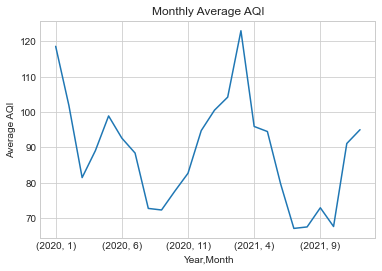

In [335]:
China.groupby(['Year','Month'])['AQI'].mean().plot(ylabel = 'Average AQI', title = 'Monthly Average AQI')

The graph before represents the monthly average AQI for both cities, now let's see how it changes for each city separately.

<AxesSubplot:title={'center':'Monthly Average AQI for Beijing'}, xlabel='Year,Month', ylabel='Average AQI'>

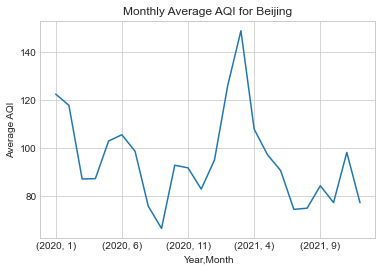

In [336]:
China[China['City']=='Beijing'].groupby(['Year','Month'])['AQI'].mean().plot(ylabel = 'Average AQI', 
                                                                             title = 'Monthly Average AQI for Beijing')


<AxesSubplot:title={'center':'Monthly Average AQI for Shanghai'}, xlabel='Year,Month', ylabel='Average AQI'>

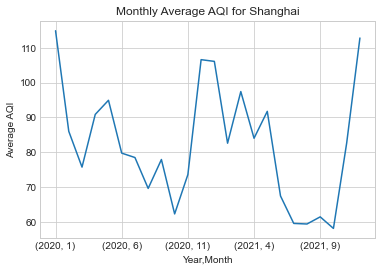

In [337]:
China[China['City']=='Shanghai'].groupby(['Year','Month'])['AQI'].mean().plot(ylabel = 'Average AQI', title = 'Monthly Average AQI for Shanghai')

Now, let's see the total of cases and deaths for each year and each city using the groupby method.

In [338]:
covid_df.groupby(['City',covid_df['Date'].dt.year]).sum()

confirmed_cases  deaths
City     Date                         
Beijing  2020           256540    2796
         2021           175691    1512
Shanghai 2020           273506    2082
         2021           313776    1176

For both years, confirmed cases were higher in the city of Shanghai. However, deaths were higher in the city of Beijing. Let's visualize the evolution of cases in a line chart.

First, let's see the trends for both cities combined.

<AxesSubplot:title={'center':'Total Number of Confirmed Cases'}, xlabel='(Year, Month)', ylabel='Number of Confirmed Cases'>

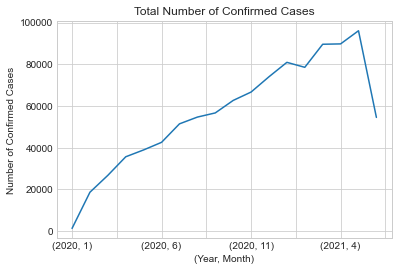

In [339]:
covid_df.groupby([covid_df['Date'].dt.year,covid_df['Date'].dt.month])['confirmed_cases'].sum().plot(xlabel = '(Year, Month)', ylabel = 'Number of Confirmed Cases', 
                                                                                                                                  title = 'Total Number of Confirmed Cases')

<AxesSubplot:title={'center':'Total Number of Deaths'}, xlabel='(Year, Month)', ylabel='Number of Deaths'>

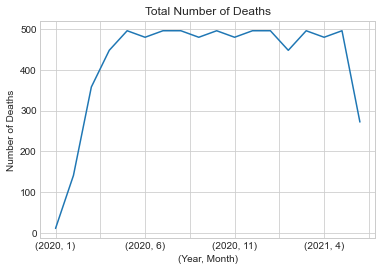

In [340]:
covid_df.groupby([covid_df['Date'].dt.year,covid_df['Date'].dt.month])['deaths'].sum().plot(xlabel = '(Year, Month)', ylabel = 'Number of Deaths',
                                                                                                                         title = 'Total Number of Deaths')

<AxesSubplot:title={'center':'Total Number of Confirmed Cases and Deaths'}, xlabel='(Year, Month)', ylabel='Number of Cases and Deaths'>

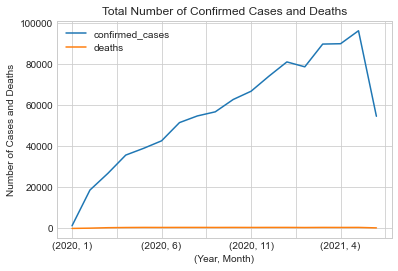

In [341]:
covid_df.groupby([covid_df['Date'].dt.year,covid_df['Date'].dt.month]).sum().plot(xlabel = '(Year, Month)', ylabel = 'Number of Cases and Deaths',
                                                                                                               title = 'Total Number of Confirmed Cases and Deaths')

Now, let's see the trend for the city of Beijing.

<AxesSubplot:title={'center':'Total Number of Confirmed Cases for Beijing'}, xlabel='(Year, Month)', ylabel='Number of Confirmed Cases'>

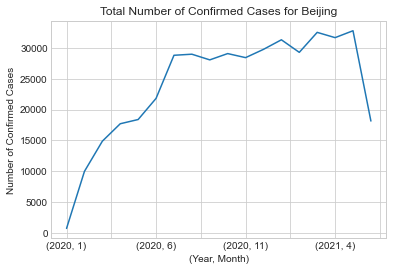

In [342]:
covid_df[covid_df['City']=='Beijing'].groupby([covid_df['Date'].dt.year,covid_df['Date'].dt.month])['confirmed_cases'].sum().plot(xlabel = '(Year, Month)', ylabel = 'Number of Confirmed Cases', 
                                                                                                                                  title = 'Total Number of Confirmed Cases for Beijing')

<AxesSubplot:title={'center':'Total Number of Deaths for Beijing'}, xlabel='(Year, Month)', ylabel='Number of Deaths'>

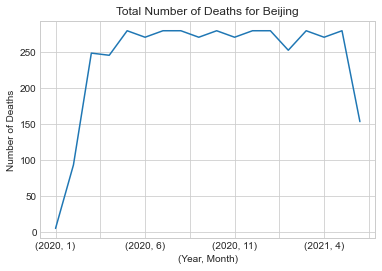

In [343]:
covid_df[covid_df['City']=='Beijing'].groupby([covid_df['Date'].dt.year,covid_df['Date'].dt.month])['deaths'].sum().plot(xlabel = '(Year, Month)', ylabel = 'Number of Deaths',
                                                                                                                         title = 'Total Number of Deaths for Beijing')

<AxesSubplot:title={'center':'Total Number of Confirmed Cases and Deaths for Beijing'}, xlabel='(Year, Month)', ylabel='Number of Cases and Deaths'>

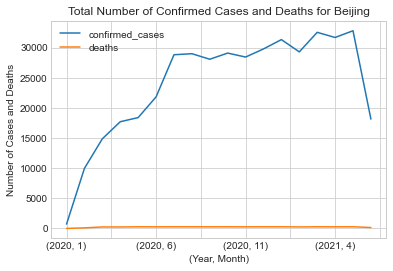

In [344]:
covid_df[covid_df['City']=='Beijing'].groupby([covid_df['Date'].dt.year,covid_df['Date'].dt.month]).sum().plot(xlabel = '(Year, Month)', ylabel = 'Number of Cases and Deaths',
                                                                                                               title = 'Total Number of Confirmed Cases and Deaths for Beijing')

Lastly, let's see the trend for the city of Shanghai.

<AxesSubplot:title={'center':'Total Number of Confirmed Cases for Shanghai'}, xlabel='(Year, Month)', ylabel='Number of Confirmed Cases'>

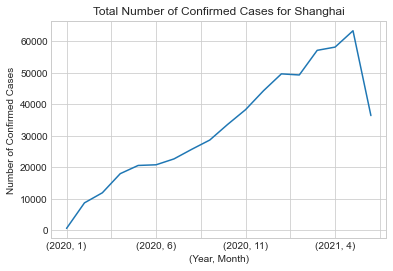

In [345]:
covid_df[covid_df['City']=='Shanghai'].groupby([covid_df['Date'].dt.year,covid_df['Date'].dt.month])['confirmed_cases'].sum().plot(xlabel = '(Year, Month)', ylabel = 'Number of Confirmed Cases', 
                                                                                                                                  title = 'Total Number of Confirmed Cases for Shanghai')

<AxesSubplot:title={'center':'Total Number of Deaths for Shanghai'}, xlabel='(Year, Month)', ylabel='Number of Deaths'>

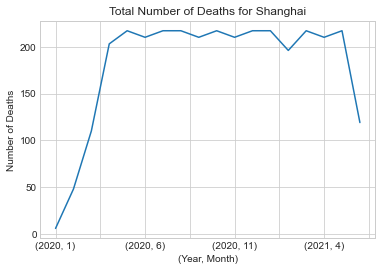

In [346]:
covid_df[covid_df['City']=='Shanghai'].groupby([covid_df['Date'].dt.year,covid_df['Date'].dt.month])['deaths'].sum().plot(xlabel = '(Year, Month)', ylabel = 'Number of Deaths',
                                                                                                                         title = 'Total Number of Deaths for Shanghai')

<AxesSubplot:title={'center':'Total Number of Confirmed Cases and Deaths for Shanghai'}, xlabel='(Year, Month)', ylabel='Number of Cases and Deaths'>

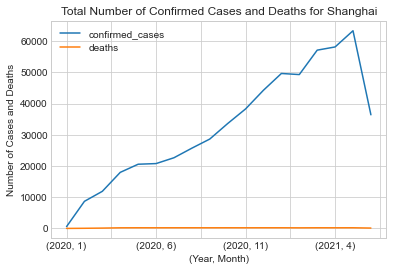

In [347]:
covid_df[covid_df['City']=='Shanghai'].groupby([covid_df['Date'].dt.year,covid_df['Date'].dt.month]).sum().plot(xlabel = '(Year, Month)', ylabel = 'Number of Cases and Deaths',
                                                                                                               title = 'Total Number of Confirmed Cases and Deaths for Shanghai')

Additionally, let's visualize the distribution of our variables for each dataframe with histograms. Let's start with the AQI data.

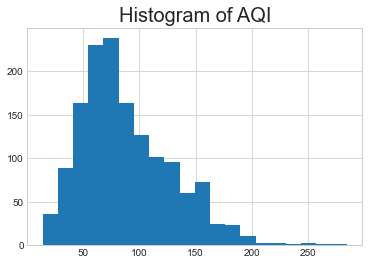

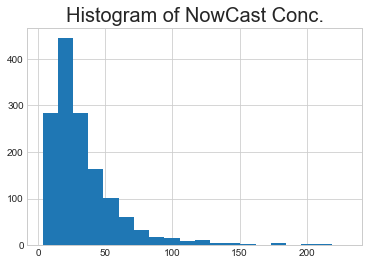

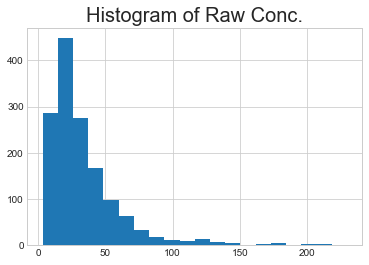

In [348]:
# AQI data
desired_columns = ['AQI', 'NowCast Conc.','Raw Conc.']
for column in desired_columns:
    fig = plt.figure(figsize=(6,4))
    plt.hist(China[column], bins=20)
    title = "Histogram of " + str(column)
    plt.grid(True)
    plt.title(title, fontsize=20)
    plt.show()


We can see a right skewed distribution in all the variables. AQI is the one closer to the normal distribution. Let's do the same for the covid data.

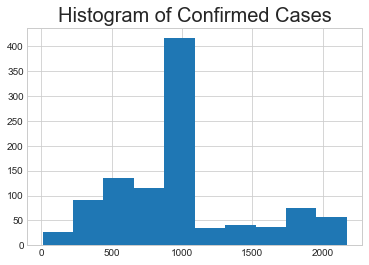

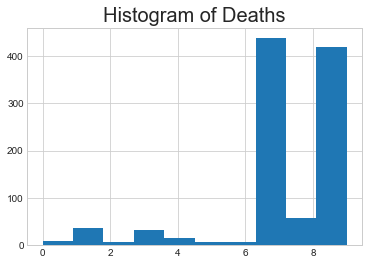

In [349]:
# COVID data
desired_columns = ['confirmed_cases', 'deaths']
for column in desired_columns:
    fig = plt.figure(figsize=(6,4))
    plt.hist(covid_df[column], bins=10)
    title = "Histogram of " + str(column).replace('_',' ').title()
    plt.grid(True)
    plt.title(title, fontsize=20)
    plt.show()

These histograms show highly skewed data for confirmed cases and deaths. Let's visualize outliers with boxplots for both of our dataframes.

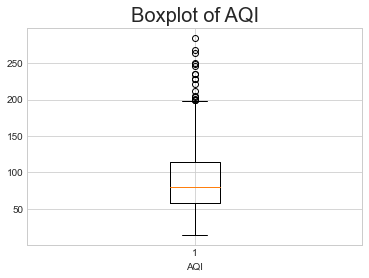

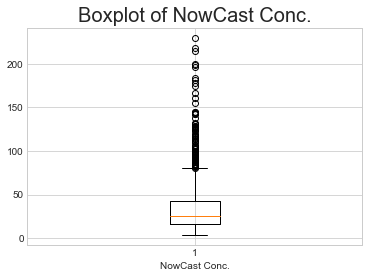

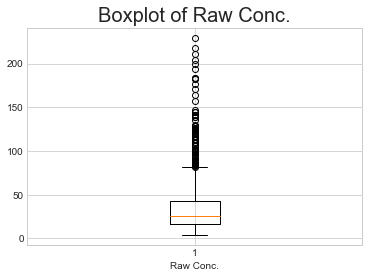

In [350]:
# AQI data
desired_columns = ['AQI', 'NowCast Conc.','Raw Conc.']
for column in desired_columns:
    fig = plt.figure(figsize=(6,4))
    plt.boxplot(China[column])
    title = "Boxplot of " + str(column)
    plt.grid(True)
    plt.xlabel(str(column))
    plt.title(title, fontsize=20)
    plt.show()

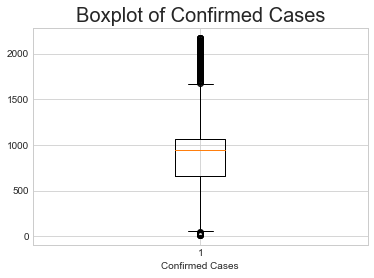

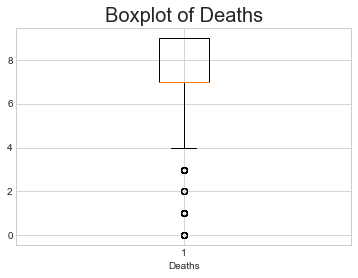

In [351]:
# COVID data
desired_columns = ['confirmed_cases', 'deaths']
for column in desired_columns:
    fig = plt.figure(figsize=(6,4))
    plt.boxplot(covid_df[column])
    title = "Boxplot of " + str(column).replace('_',' ').title()
    plt.grid(True)
    plt.xlabel(str(column).replace('_',' ').title())
    plt.title(title, fontsize=20)
    plt.show()

It's clear that all of our variables have outliers, as all of them have observations out of the range of the boxplots. However, these observations will not be removes as they are real observations and valuable information.

Now that we have a better understanding of our data, let's continue by joining both dataframes and realizing a correlation analysis to find out if COVID-19 confirmed cases and deaths are related to air quality.

# AQI and COVID-19 Analysis

Before joining our AQI dataframe with our COVID-19 dataframe, let's check what the data looks like.

In [352]:
China.head()

,City,Parameter,Date (LT),Year,Month,Day,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,QC Name
0,Beijing,PM2.5 - Principal,2020-01-01,2020,1,1,31.1,91.7,Moderate,31.7,UG/M3,Valid
1,Beijing,PM2.5 - Principal,2020-01-02,2020,1,2,50.6,135.2,Unhealthy for Sensitive Groups,51.2,UG/M3,Valid
2,Beijing,PM2.5 - Principal,2020-01-03,2020,1,3,49.0,126.1,Unhealthy for Sensitive Groups,49.0,UG/M3,Valid
3,Beijing,PM2.5 - Principal,2020-01-04,2020,1,4,36.8,100.7,Unhealthy for Sensitive Groups,36.2,UG/M3,Valid
4,Beijing,PM2.5 - Principal,2020-01-05,2020,1,5,61.5,153.8,Unhealthy,62.0,UG/M3,Valid


In [353]:
covid_df.head()

,City,Date,confirmed_cases,deaths
0,Beijing,2020-01-22,14,0
1,Shanghai,2020-01-22,9,0
2,Beijing,2020-01-23,22,0
3,Shanghai,2020-01-23,16,0
4,Beijing,2020-01-24,36,0


Again, let's check the types  of each column.

In [354]:
covid_df.dtypes

City                       string
Date               datetime64[ns]
confirmed_cases             int64
deaths                      int64
dtype: object

In [355]:
China.dtypes

City                     object
Parameter                object
Date (LT)        datetime64[ns]
Year                      int64
Month                     int64
Day                       int64
NowCast Conc.           float64
AQI                     float64
AQI Category             object
Raw Conc.               float64
Conc. Unit               object
QC Name                  object
dtype: object

Now, let's merge both dataframes based on each city and date.

In [356]:
mergeddf = pd.merge(China, covid_df,  how='inner', left_on=['City','Date (LT)'], right_on = ['City','Date'])
mergeddf.head()

,City,Parameter,Date (LT),Year,Month,Day,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,QC Name,Date,confirmed_cases,deaths
0,Beijing,PM2.5 - Principal,2020-01-22,2020,1,22,65.3,156.1,Unhealthy,67.3,UG/M3,Valid,2020-01-22,14,0
1,Beijing,PM2.5 - Principal,2020-01-23,2020,1,23,56.3,129.1,Unhealthy for Sensitive Groups,55.0,UG/M3,Valid,2020-01-23,22,0
2,Beijing,PM2.5 - Principal,2020-01-24,2020,1,24,73.1,150.3,Unhealthy,73.8,UG/M3,Valid,2020-01-24,36,0
3,Beijing,PM2.5 - Principal,2020-01-25,2020,1,25,131.6,195.8,Unhealthy,135.6,UG/M3,Valid,2020-01-25,41,0
4,Beijing,PM2.5 - Principal,2020-01-26,2020,1,26,166.9,221.5,Very Unhealthy,170.8,UG/M3,Valid,2020-01-26,68,0


Let's check if our merged dataframe has any data accuracy issue or missing values.

In [357]:
mergeddf.isnull().sum(axis = 0)

City               0
Parameter          0
Date (LT)          0
Year               0
Month              0
Day                0
NowCast Conc.      0
AQI                0
AQI Category       0
Raw Conc.          0
Conc. Unit         0
QC Name            0
Date               0
confirmed_cases    0
deaths             0
dtype: int64

Let's apply the info method to the dataframe to check types and non-null counts for each column.

In [358]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1021
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City             1022 non-null   object        
 1   Parameter        1022 non-null   object        
 2   Date (LT)        1022 non-null   datetime64[ns]
 3   Year             1022 non-null   int64         
 4   Month            1022 non-null   int64         
 5   Day              1022 non-null   int64         
 6   NowCast Conc.    1022 non-null   float64       
 7   AQI              1022 non-null   float64       
 8   AQI Category     1022 non-null   object        
 9   Raw Conc.        1022 non-null   float64       
 10  Conc. Unit       1022 non-null   object        
 11  QC Name          1022 non-null   object        
 12  Date             1022 non-null   datetime64[ns]
 13  confirmed_cases  1022 non-null   int64         
 14  deaths           1022 non-null   int64  

Let's also check the summary statistics.

In [359]:
mergeddf.describe()

,Year,Month,Day,NowCast Conc.,AQI,Raw Conc.,confirmed_cases,deaths
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,2020.325832,5.689824,15.689824,36.184149,92.561155,36.282192,990.317025,7.373777
std,0.468914,3.292569,8.839447,29.517380,41.966300,29.636463,473.914240,2.021243
min,2020.000000,1.000000,1.000000,3.700000,15.400000,3.400000,9.000000,0.000000
25%,2020.000000,3.000000,8.000000,18.000000,61.950000,17.600000,660.000000,7.000000
50%,2020.000000,5.000000,16.000000,27.300000,83.000000,27.550000,940.500000,7.000000
75%,2021.000000,8.000000,23.000000,45.275000,119.575000,45.275000,1064.000000,9.000000
max,2021.000000,12.000000,31.000000,229.800000,284.800000,229.500000,2173.000000,9.000000


From the output above we can see that our numerical variables are all within range. 

Furthermore, as we need specific columns we will further create a new dataset with only the required columns.

In [360]:
mergerd_Final = mergeddf[['City', 'Date','AQI','NowCast Conc.','Raw Conc.', 'confirmed_cases','deaths']]
mergerd_Final.head()

,City,Date,AQI,NowCast Conc.,Raw Conc.,confirmed_cases,deaths
0,Beijing,2020-01-22,156.1,65.3,67.3,14,0
1,Beijing,2020-01-23,129.1,56.3,55.0,22,0
2,Beijing,2020-01-24,150.3,73.1,73.8,36,0
3,Beijing,2020-01-25,195.8,131.6,135.6,41,0
4,Beijing,2020-01-26,221.5,166.9,170.8,68,0


Let's see the info and dimensions for our final dataframe.

In [361]:
mergerd_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1021
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City             1022 non-null   object        
 1   Date             1022 non-null   datetime64[ns]
 2   AQI              1022 non-null   float64       
 3   NowCast Conc.    1022 non-null   float64       
 4   Raw Conc.        1022 non-null   float64       
 5   confirmed_cases  1022 non-null   int64         
 6   deaths           1022 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 63.9+ KB


In [362]:
print("The AQI and Covid-19 combined dataframe has", mergerd_Final.shape[0], "rows and", mergerd_Final.shape[1], "columns.")

The AQI and Covid-19 combined dataframe has 1022 rows and 7 columns.


Now, let's perform correlation analysis between AQI and confirmed cases to find out if the air quality can be used to estimate covid-19 confirmed cases.

In [363]:
mergerd_Final['AQI'].corr(mergerd_Final['confirmed_cases'])

-0.04516577937216651

Let's do the same correlation analysis for AQI and covid deaths.

In [364]:
mergerd_Final['AQI'].corr(mergerd_Final['deaths'])

-0.010879934667978876

Now, we have seen a correlation coefficient that indicates no correlation between AQI and confirmed cases and deaths. However, correlation coefficient only applies to linear relationships, let's visualize the data to see if we can see any non-linear relationship.

<AxesSubplot:xlabel='AQI', ylabel='confirmed_cases'>

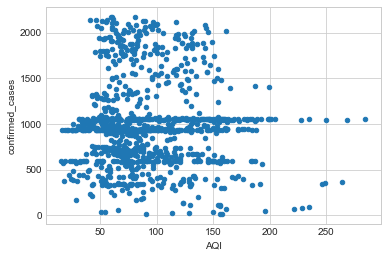

In [365]:
mergerd_Final.plot.scatter(x = 'AQI', y = 'confirmed_cases')

<AxesSubplot:xlabel='confirmed_cases', ylabel='deaths'>

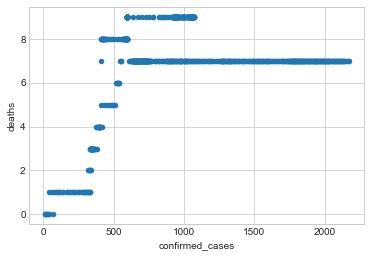

In [366]:
mergerd_Final.plot.scatter(x = 'confirmed_cases', y = 'deaths')



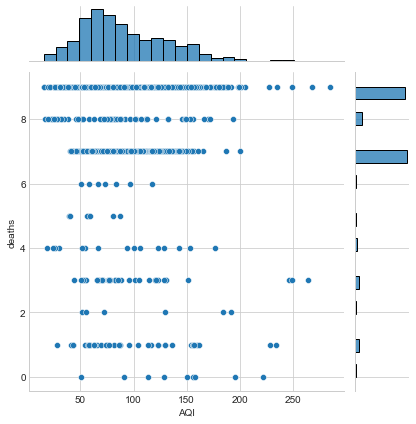

In [367]:
sns.jointplot(x='AQI',y='deaths', data=mergerd_Final)

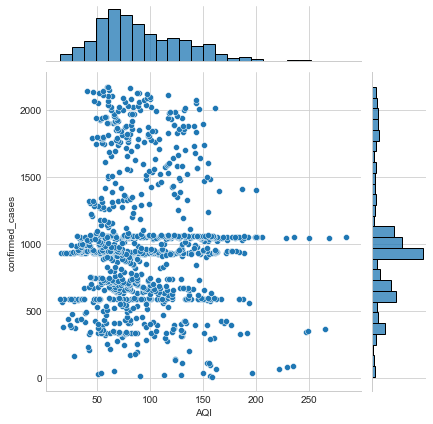

In [368]:
sns.jointplot(x='AQI',y='confirmed_cases', data=mergerd_Final)

As can be seen from all the graphs presented above, AQI does not show any kind of relationship to COVID-19 cases or deaths.

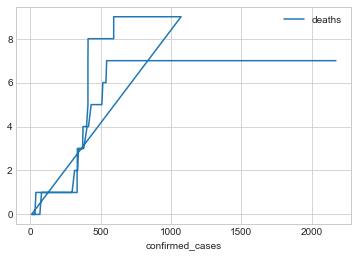

In [369]:
mergerd_Final.plot(x="confirmed_cases", y="deaths", kind="line")
plt.show()

However, as it is to be expected, COVID-19 cases is related to COVID-19 deaths.

<AxesSubplot:>

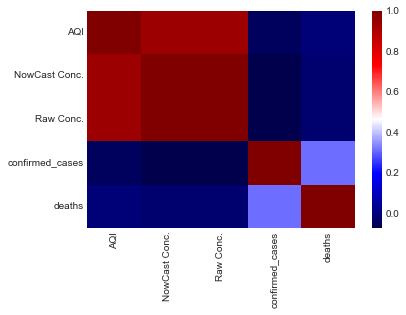

In [370]:
# correlation analysis
sns.heatmap(mergerd_Final.corr(), cmap='seismic')

With this heatmap, we can see that AQI has strong correlation to NowCast Conc and Raw Conc, while confirmed cases is weakly correlated to deaths.

<AxesSubplot:>

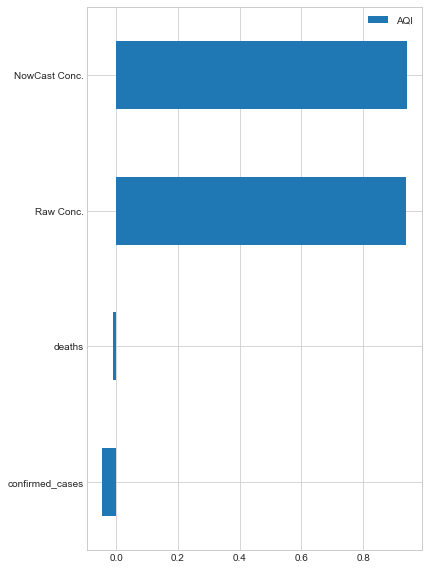

In [371]:
# and correlation only with AQI
fig, ax = plt.subplots(figsize=(6,10))
mergerd_Final.corr()['AQI'].sort_values().to_frame().drop('AQI').plot.barh(ax=ax)

Again, AQI is correlated to NowCast Conc and Raw Conc. And it is not correlated to deaths nor confirmed cases.

Finally, we have proved that covid-19 confirmed cases and deaths are not related to the air quality of the place they are happening in. We understand that this data can be used to make predictions on COVID-19 cases and deaths as an experiment. However, we don't think those predictions will be very good, as the variables are not related.

# Team Members

1. Heena Grover - 100375698
2. Kyra Melenciano - 100379793
3. Mohammad Akmad - 100376897
4. Preet Mann - 100368586